# Nisə Aslanzadə

Ikl öncə lazimlı kitabxanaları yükləyək.

In [1]:
# Data import ve her hansi operation istifadə edmək üçün kitabxanalar

import pandas as pd
import numpy as np
import copy
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # warning-lərin qarşısını almaq üçün

# Visualization üçün istifadə olunan kitabxanalar

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 

# Machine Learning modeli qurmag üçün və modelin performansını ölcmək üçün metric kitabxanaları

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, f1_score, make_scorer,  accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score

/Users/apple/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Data ilə tanışlıq

In [2]:
data = pd.read_csv('bank-direct-marketing-campaigns(in).csv')

df = copy.deepcopy(data)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y(dependent _variable)
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(41188, 20)

In [4]:
print(f'Sütunlarımızın adları:\n{df.columns.tolist()}')

Sütunlarımızın adları:
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y(dependent _variable)']


In [5]:
# DataFrame-inin sütun adlarını daha oxunaqlı və istifadə üçün rahat edək 

df.columns = [i.lower().strip().replace('.','_') for i in df.columns] 

df = df.rename(columns = {'y(dependent _variable)': 'y',
                          'euribor3m': 'euribor_3m'})

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
# DataFrame-indəki hər bir sütunun data type

df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor_3m        float64
nr_employed       float64
y                  object
dtype: object

In [8]:
# DataFrame-indəki hər bir sütunda olan boş (NA) dəyərləri

df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor_3m        0
nr_employed       0
y                 0
dtype: int64

<Axes: >

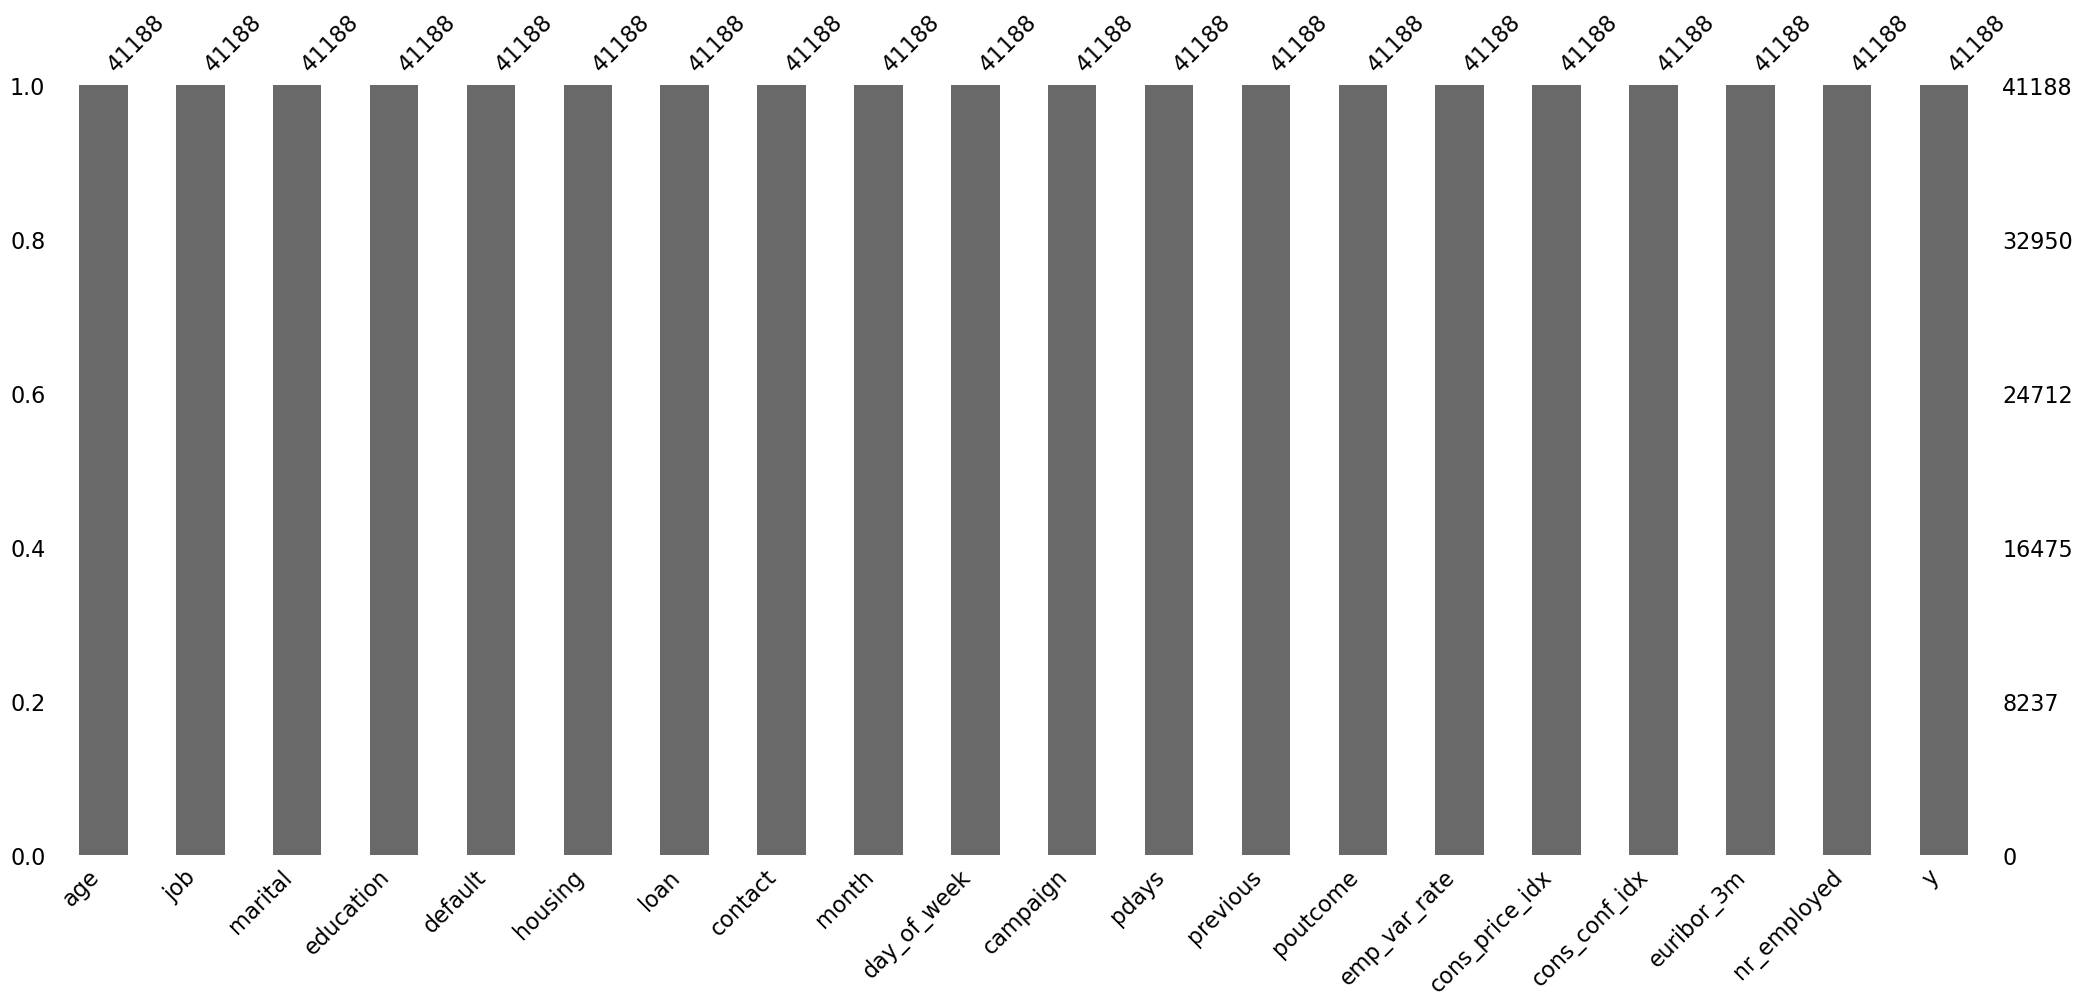

In [9]:
# Birdə vizual olaraq baxaq

msno.bar(df)

Hec bir Null dəyərimiz yoxdur\
İndi isə dataframe-də dublicated dəyərlərin olub olmadığını yoxlayaq

In [10]:
# DataFrame-indəki duplicat value baxaq

df.duplicated().sum()

1784

In [11]:
df[df.duplicated(keep = False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
11,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40404,41,entrepreneur,married,university.degree,no,yes,no,cellular,aug,thu,1,999,0,nonexistent,-1.7,94.027,-38.3,0.904,4991.6,yes
40804,35,technician,married,professional.course,no,yes,no,cellular,sep,thu,1,999,2,failure,-1.1,94.199,-37.5,0.878,4963.6,no
40806,35,technician,married,professional.course,no,yes,no,cellular,sep,thu,1,999,2,failure,-1.1,94.199,-37.5,0.878,4963.6,no
40833,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no


In [12]:
df = df.drop_duplicates()

In [13]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
df.shape  # duplicat-sız datanın shape

(39404, 20)

# Descriptive Analiz

In [15]:
# DataFrame-indəki statistic dəyərlərə baxaq (yanlız numeric sütunları)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,39404.0,40.116105,10.460328,17.000,32.000,38.000,47.000,98.000
campaign,39404.0,2.618744,2.814780,1.000,1.000,2.000,3.000,56.000
pdays,39404.0,960.847097,190.869184,0.000,999.000,999.000,999.000,999.000
previous,39404.0,0.178738,0.503172,0.000,0.000,0.000,0.000,7.000
emp_var_rate,39404.0,0.064067,1.577041,-3.400,-1.800,1.100,1.400,1.400
cons_price_idx,39404.0,93.577538,0.583820,92.201,93.075,93.798,93.994,94.767
cons_conf_idx,39404.0,-40.499604,4.644327,-50.800,-42.700,-41.800,-36.400,-26.900
euribor_3m,39404.0,3.601243,1.742337,0.634,1.334,4.857,4.961,5.045
nr_employed,39404.0,5165.986481,72.763866,4963.600,5099.100,5191.000,5228.100,5228.100


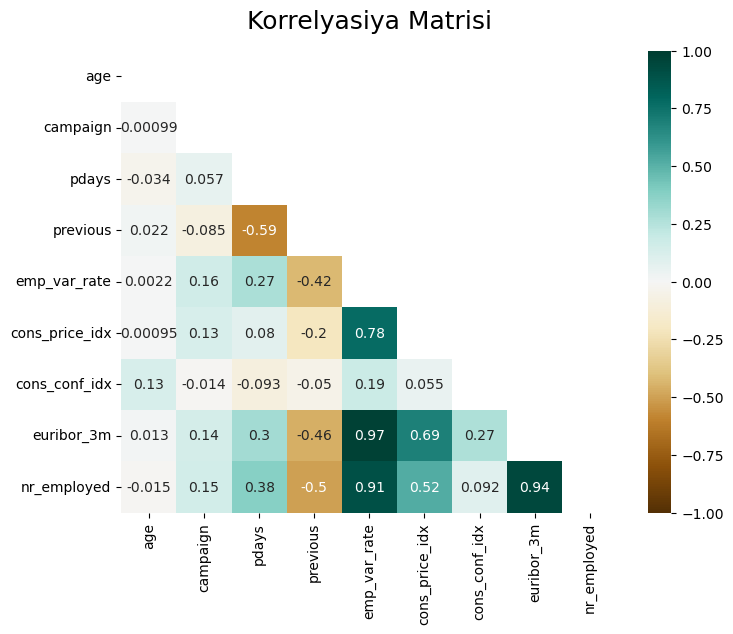

In [16]:
# Yalnız numeric sütunları 
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(numeric_df.corr(), dtype=bool))
heatmap = sns.heatmap(numeric_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Korrelyasiya Matrisi', fontdict={'fontsize':18}, pad=16)
plt.show()

Korelasiya matrisinizdə bəzi sütunlar arasında yüksək korrelyasiya var, bu da modelinizdə multikolinearlıq problemi yarada bilər.\
**euribor_3m və emp_var_rate:** Bu sütunlar arasında çox yüksək müsbət korrelyasiya var (0.97).\
**nr_employed və emp_var_rate:** Burada da yüksək müsbət korrelyasiya (0.91) var.

# Visualization

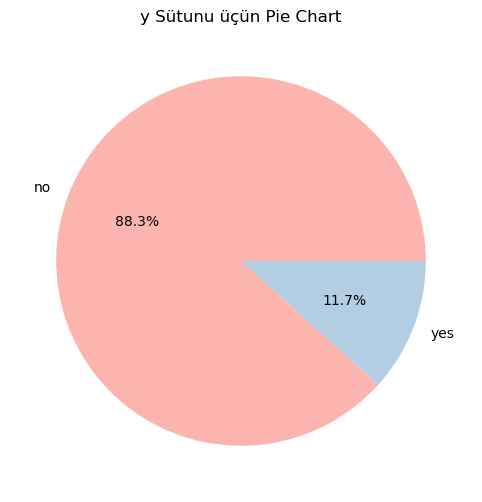

In [17]:
# Müştəri müddətli depozitə abone olmasına baxaq

value_counts = df['y'].value_counts(dropna = False)

plt.figure(figsize = (8, 6))
plt.pie(value_counts, labels = value_counts.index, autopct = '%1.1f%%', colors = plt.cm.Pastel1.colors)
plt.title('y Sütunu üçün Pie Chart')
plt.show()

Dəyərlərimizdən başa düşürük ki burada imbalance problemi vardir: **no - 34806, yes - 4598**

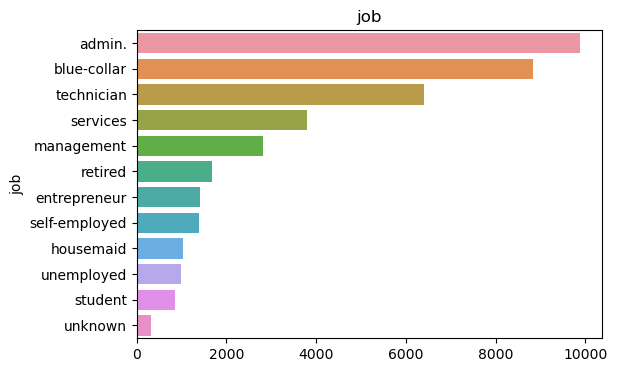

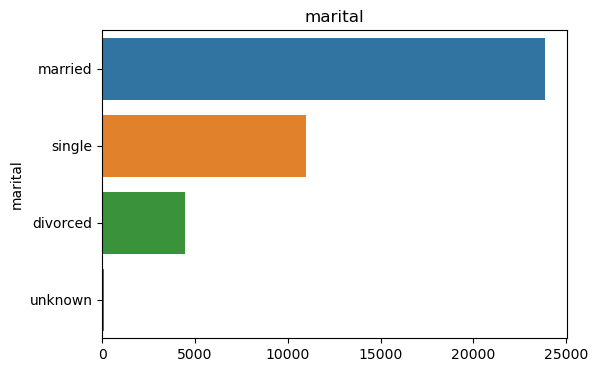

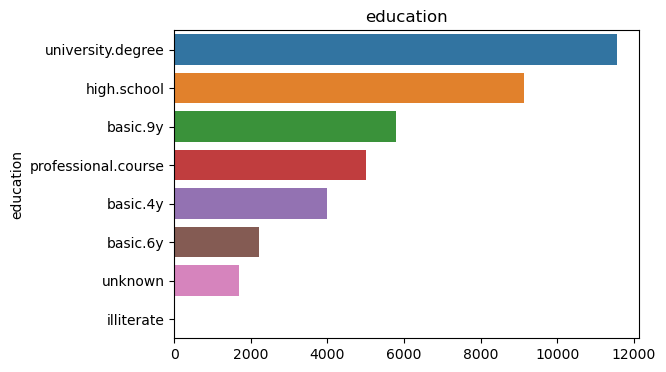

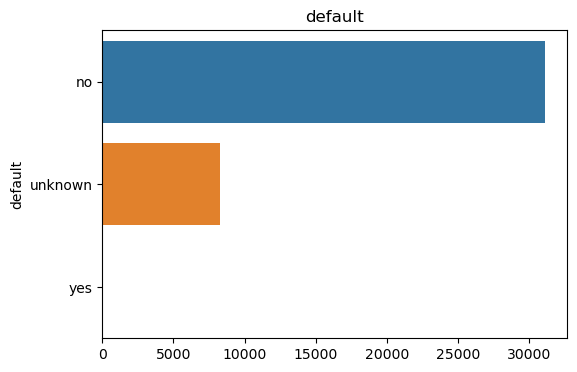

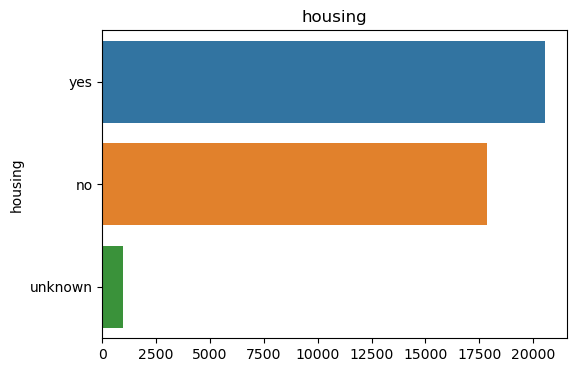

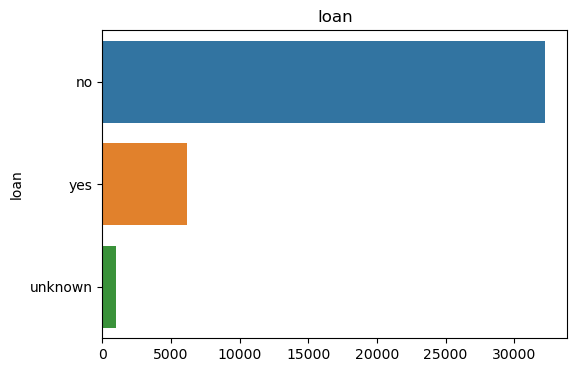

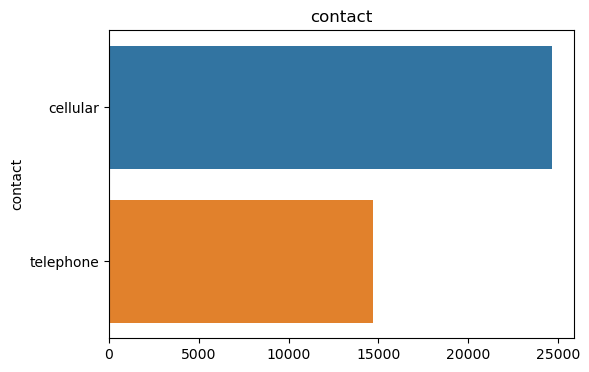

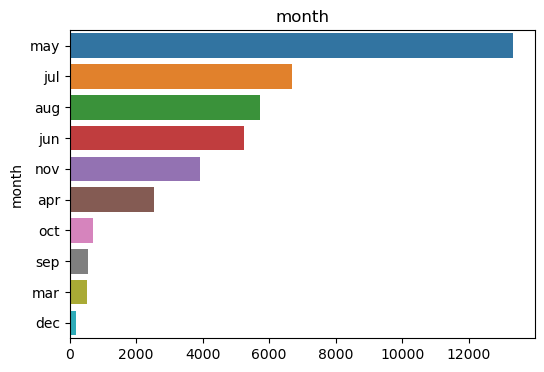

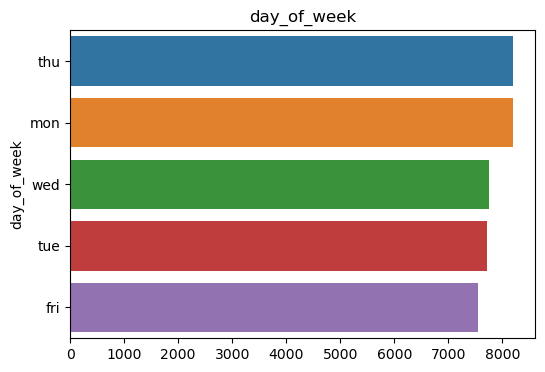

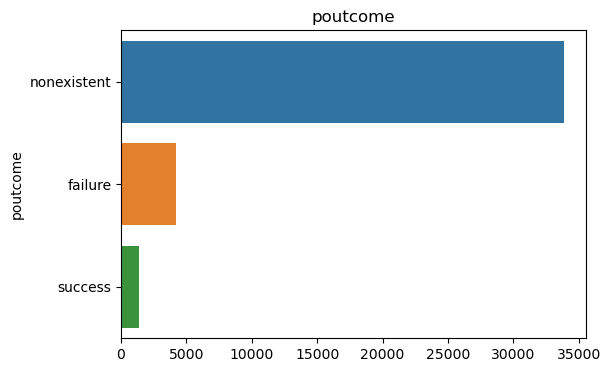

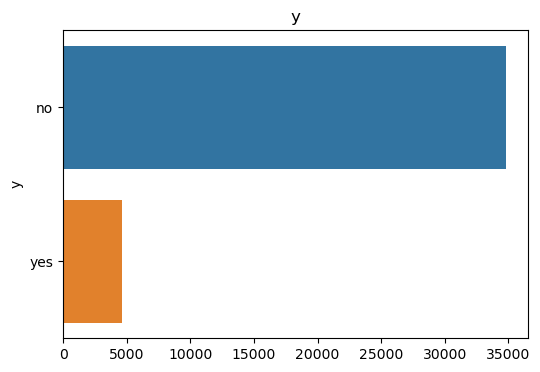

In [18]:
# Categoric sütunlarımızın sayılarına vizual olaraq baxaq

categorical_variables = df.select_dtypes(include=['object']).columns
# ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

for col in categorical_variables:
    plt.figure(figsize=(6, 4))
    sns.barplot(x = df[col].value_counts().values, y = df[col].value_counts().index)
    plt.title(col)
    plt.show()  

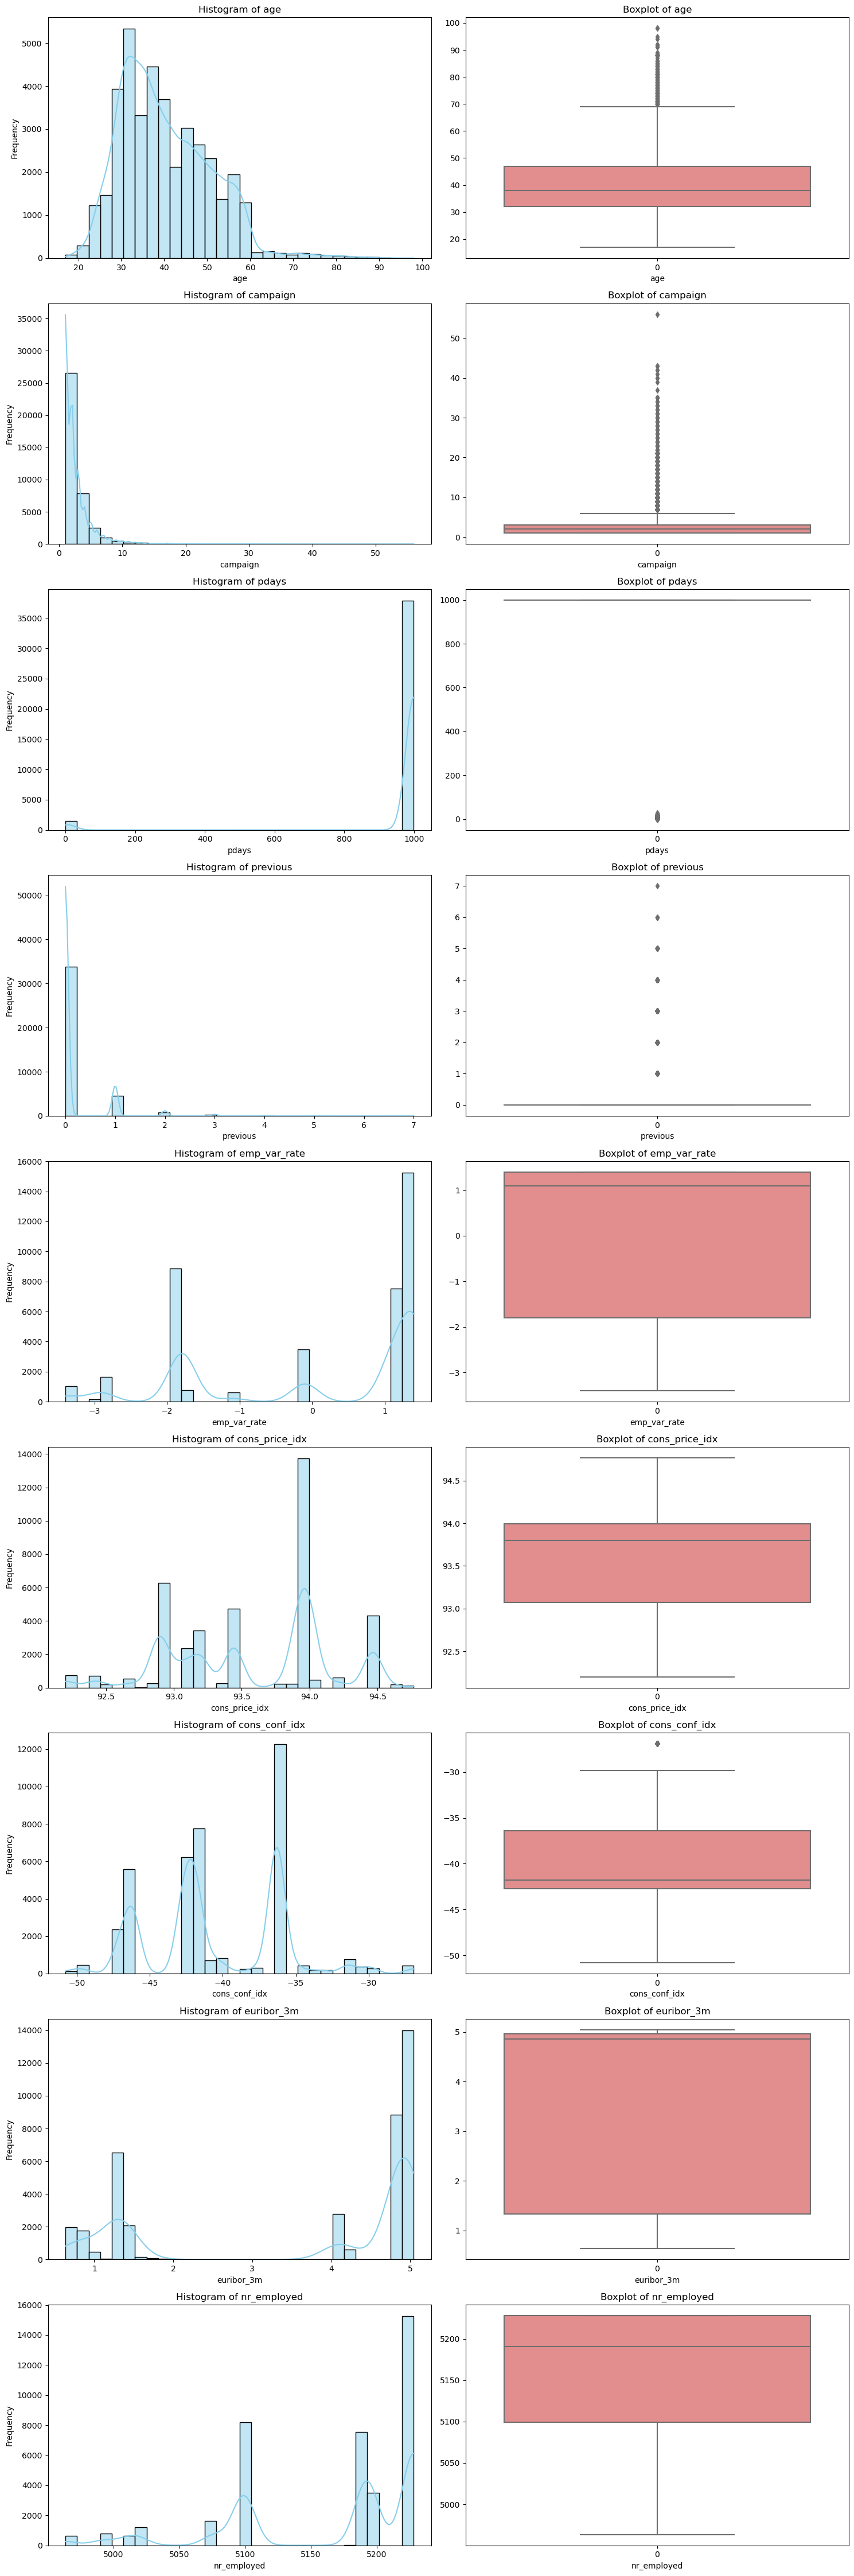

In [19]:
# Numeric sütuları üçün histogram və boxplot quraq

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(nrows = len(numeric_cols), ncols=2, figsize=(15, len(numeric_cols) * 5))

for i, col in enumerate(numeric_cols):
    # histogram
    sns.histplot(df[col], bins = 30, ax = axes[i, 0], kde = True, color = 'skyblue')
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')
    
    # boxplot
    sns.boxplot(df[col], ax = axes[i, 1], color = 'lightcoral')
    axes[i, 1].set_title(f'Boxplot of {col}')
    axes[i, 1].set_xlabel(col)
    
plt.tight_layout()
plt.show()

In [20]:
# DataFrame-indəki hər sütunun unique dəyərlərinə baxaq

df.nunique()

age                78
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           42
pdays              27
previous            8
poutcome            3
emp_var_rate       10
cons_price_idx     26
cons_conf_idx      26
euribor_3m        316
nr_employed        11
y                   2
dtype: int64

In [21]:
# Aşağıdakı qeyd olunan sütunlarda hər bir unique dəyərdən nə qədərdir olduğuna baxaq

columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'previous', 'poutcome', 'y']

value_counts = {col: df[col].value_counts() for col in columns}

for col, counts in value_counts.items():
    print(f'{counts}\n')

job
admin.           9873
blue-collar      8835
technician       6404
services         3801
management       2820
retired          1683
entrepreneur     1405
self-employed    1386
housemaid        1028
unemployed        992
student           852
unknown           325
Name: count, dtype: int64

marital
married     23869
single      10997
divorced     4459
unknown        79
Name: count, dtype: int64

education
university.degree      11561
high.school             9121
basic.9y                5785
professional.course     5018
basic.4y                3993
basic.6y                2222
unknown                 1686
illiterate                18
Name: count, dtype: int64

default
no         31135
unknown     8266
yes            3
Name: count, dtype: int64

housing
yes        20561
no         17863
unknown      980
Name: count, dtype: int64

loan
no         32248
yes         6176
unknown      980
Name: count, dtype: int64

contact
cellular     24673
telephone    14731
Name: count, dtype: int64

m

# NA imputation

Məlumatlar arasında bir çox sütun üçün **unknown** dəyərlər var. Çatışmayan məlumatları idarə etməyin bir çox yolu var. Yollardan biri sıradan imtina etməkdir, lakin bu, məlumatların azalmasına səbəb olacaq və buna görə də dəqiq proqnozlaşdırma modelini qurmaq məqsədimizə uyğun olmayacaq. Digər üsul, unknown dəyişənin dəyərini digər dəyişənlərdən ağıllı şəkildə çıxarmaqdır. 

Unknown dəyərləri olan dəyişənlər: **'job', 'marital', 'education', 'default', 'housing' və 'loan'**. \
Amma önəmli olanlar 'job', 'education', 'housing' və 'loan'-dir. \
'material' üçün bilinməyənlərin sayı 79-dur və bu çox azdır. \
'default' dəyişəni üçün unknown olanlar unknown kimi qeydə alınır. Ola bilər ki, müştəri bu məlumatı banka  açıqlamaq istəmir. Beləliklə, 'default'-dakı unknown dəyər əslində ayrı bir dəyərdir.

İndi **'job' və 'education'** da unknown dəyərləri dolduraq. Buradakı fərziyyəm odur ki, 'job' insanın 'education'-dan təsirlənir. Beləliklə, insanın təhsilinə əsaslanaraq 'job' nəticəsinə gələ bilərik. 

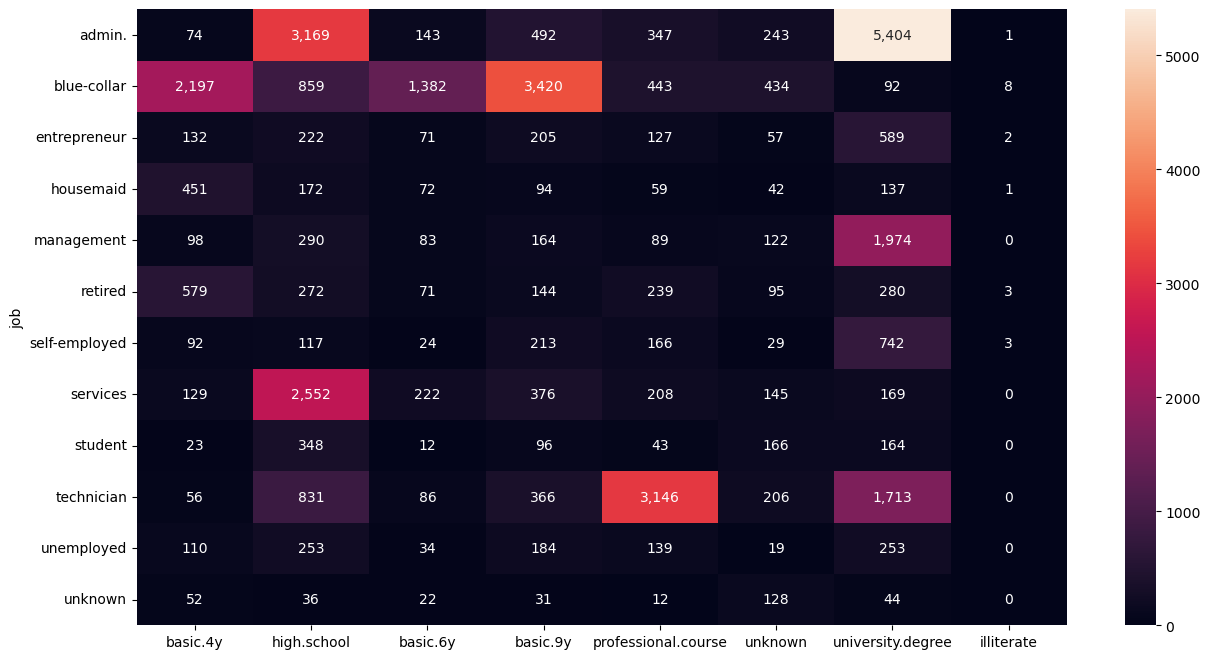

In [22]:
def cross_tab(df, jobs_col, educations_col):
    
    jobs = list(df[jobs_col].unique())             # təkrarlanan 'job'
    educations = list(df[educations_col].unique()) # təkrarlanan 'education'
    dataframe = []
    
    for edu in educations:
        df_filtered = df[df[educations_col] == edu]
        job_counts = df_filtered.groupby(jobs_col).count()[educations_col] # hər bir 'education' üçün 'job' növlərinin sayını hesablayın
        dataframe.append(job_counts)
        
    cross_tab_df = pd.concat(dataframe, axis = 1)
    cross_tab_df.columns = educations
    cross_tab_df = cross_tab_df.fillna(0)
    
    return cross_tab_df


crosstab_result = cross_tab(df, 'job', 'education')

plt.figure(figsize=(15, 8))
sns.heatmap(crosstab_result, annot = True, fmt = ',.0f')
plt.show()

Bu məlumatlar vasitəsilə, 'education' və 'job' sütunları arasında olan əlaqələri daha aydın şəkildə görmək olar. Bu məlumatlara əsaslanaraq, 'education' uyğun olaraq 'job' təxmin etmək üçün bu cədvəldən istifadə edirəm.

In [23]:
def fill_unknown_jobs(rows, crosstab_result):
    
    if rows['job'] == 'unknown':
        edu = rows['education']
        return crosstab_result[edu].idxmax()  # cədvəldən ən çox təkrarlanan 'job' 
    else:
        return rows['job']

df['job'] = df.apply(lambda row: fill_unknown_jobs(row, crosstab_result), axis=1)

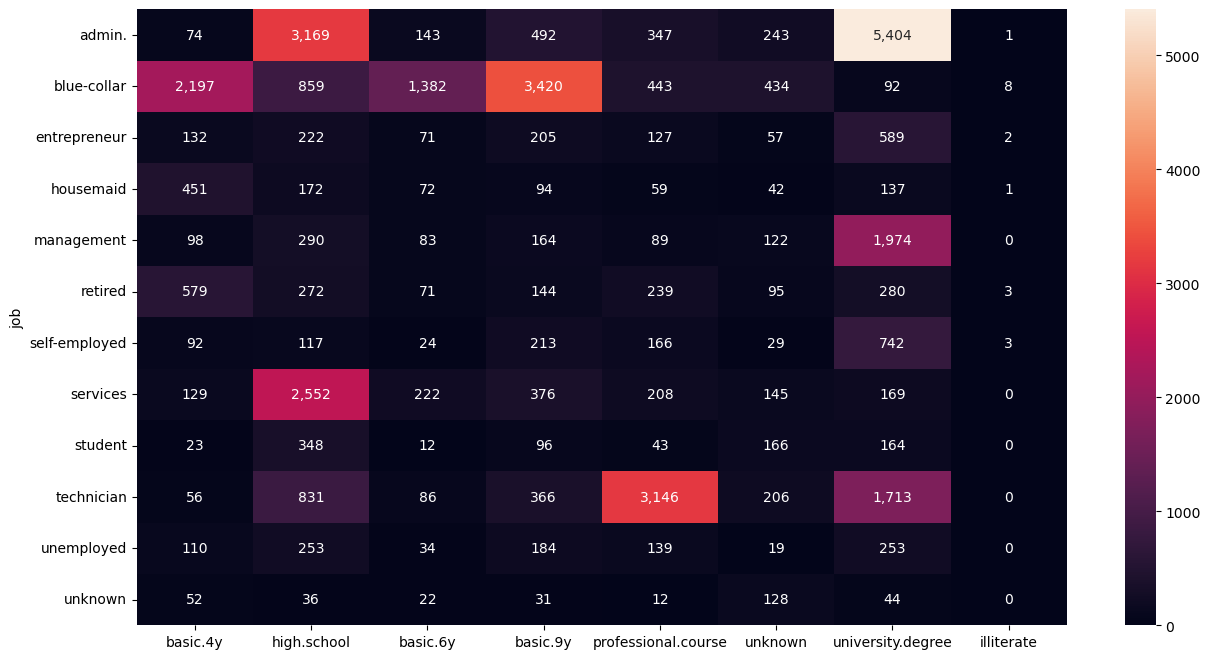

In [24]:
plt.figure(figsize=(15, 8))
sns.heatmap(crosstab_result, annot = True, fmt = ',.0f')
plt.show()

Gördüyümüz kimi 'job' sütununda unknown dəyərində qalmayıb.

**'job'-dan 'educatin' nəticə çıxarmaq**: \
Cədvəldən görmək olar ki, idarəetmə işləri olan insanlar adətən ali təhsillidirlər. Beləliklə, 'job' = idarəetmə və 'education' = unknown olduqda, biz 'education'-u 'university.degree' ilə əvəz edə bilərik. Və digərdəyərləridə logical evəz edmək olar.

In [25]:
def fill_unknown_education(rows):

    job_education_map = {
        'admin.': 'university.degree',
        'blue-collar': 'basic.9y',
        'entrepreneur': 'university.degree',
        'housemaid': 'basic.4y',
        'management': 'university.degree',
        'retired': 'basic.4y',
        'self-employed': 'university.degree',
        'services': 'high.school',
        'student': 'high.school',
        'technician': 'professional.course',
        'unemployed': 'high.school'
        
    }
    
    if rows['education'] == 'unknown':
        return job_education_map.get(rows['job'], 'unknown')
    
    return rows['education']

df['education'] = df.apply(fill_unknown_education, axis = 1)

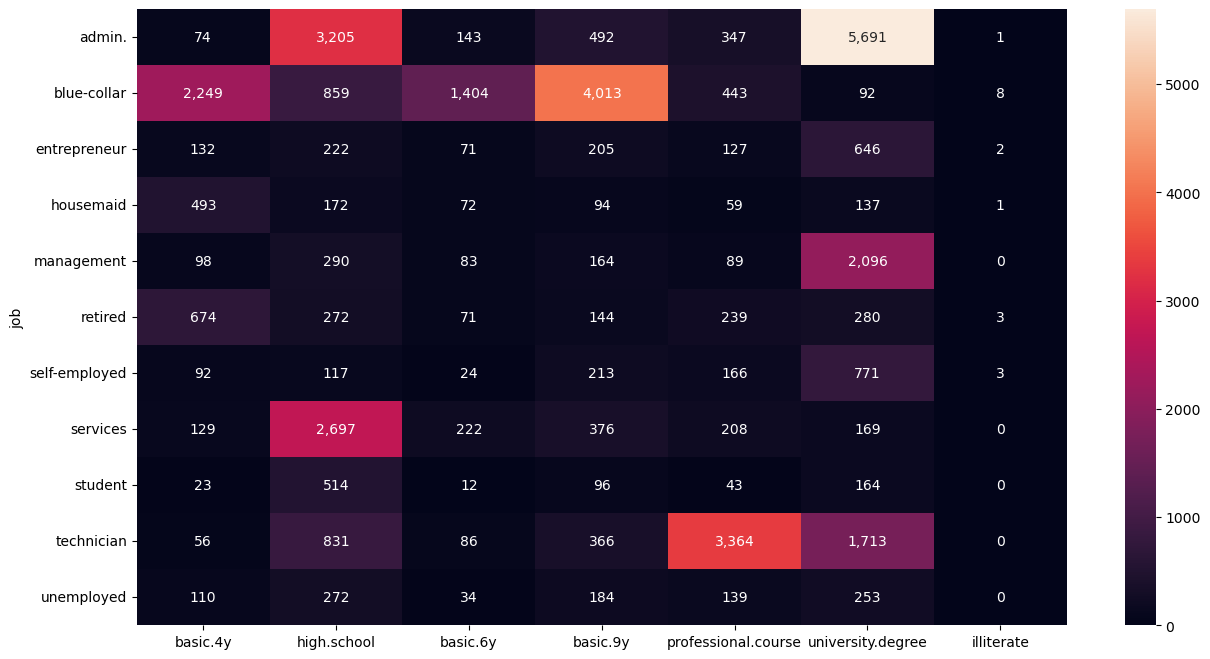

In [26]:
crosstab_result = cross_tab(df, 'job', 'education')

plt.figure(figsize=(15, 8))
sns.heatmap(crosstab_result, annot = True, fmt = ',.0f')
plt.show()

Beləliklə görük ki, 'education' sütununda unknown dəyərində qalmayıb.

In [27]:
# Birdə belə baxaq

value_counts = {col: df[col].value_counts() for col in ['job', 'education']}

for col, counts in value_counts.items():
    print(f'{counts}\n')

job
admin.           9953
blue-collar      9068
technician       6416
services         3801
management       2820
retired          1683
entrepreneur     1405
self-employed    1386
housemaid        1028
unemployed        992
student           852
Name: count, dtype: int64

education
university.degree      12012
high.school             9451
basic.9y                6347
professional.course     5224
basic.4y                4130
basic.6y                2222
illiterate                18
Name: count, dtype: int64



**'job' və ' education' sütunlarında unknown dəyərlərimiz artıq yoxdur!**

İndi isə **'housing' və 'loan'** sütunları üçün unknown dəyərlərini logical dolduraq.

In [28]:
# Birinci yeniden ne qeder unkown dəyərin olduğuna baxaq

print(df['housing'].value_counts())
print(df['loan'].value_counts())

housing
yes        20561
no         17863
unknown      980
Name: count, dtype: int64
loan
no         32248
yes         6176
unknown      980
Name: count, dtype: int64


İlk öncə 'housing' sütununu logical 'job' sütununa əsasən unknown dəyərlərini dolduraq. Mənim fərziyyəm ondan ibarətdir ki, 'housing' hər bir 'job' kateqoriyasına nisbətdə olmalıdır.

In [29]:
job_column = df['job'].unique()

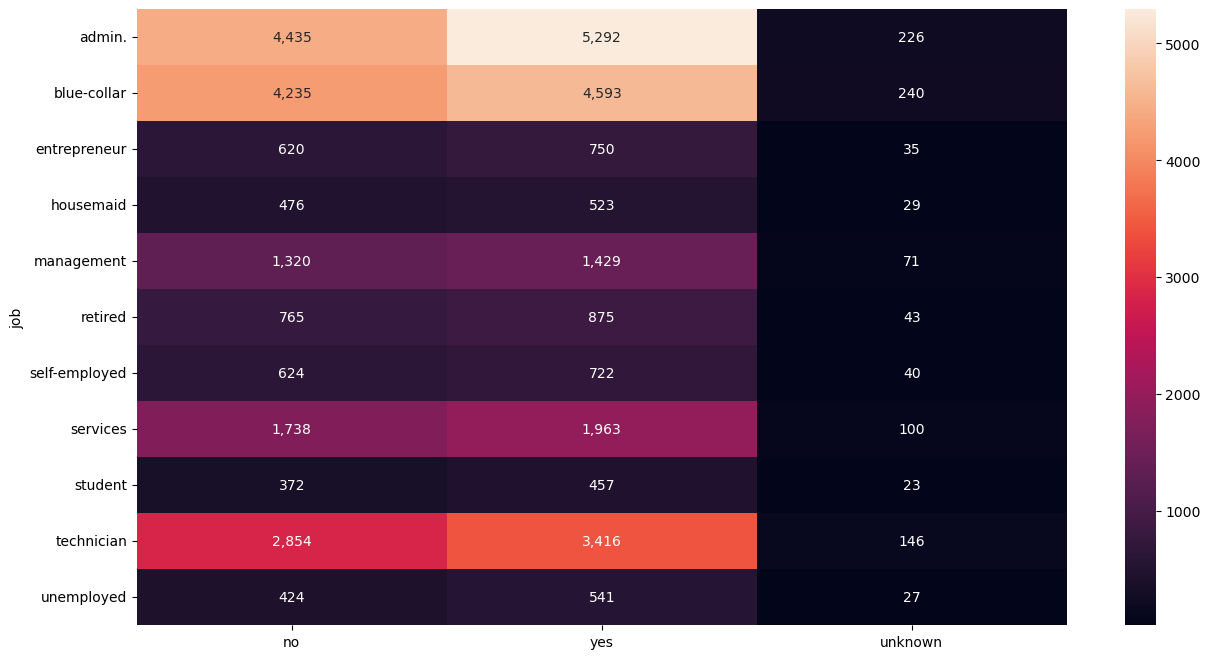

In [30]:
jobs_housing = cross_tab(df, 'job', 'housing')

plt.figure(figsize=(15, 8))
sns.heatmap(jobs_housing, annot = True, fmt = ',.0f')
plt.show()

In [31]:
def fill_housing(df, jobs_housing):
    
    for i in job_column:
        ind = df[(df['housing'] == 'unknown') & (df['job'] == i)].index
        
        probability_no = jobs_housing.loc[i]['no'] / (jobs_housing.loc[i]['no'] + jobs_housing.loc[i]['yes']) # ehtimalı hesablayırıq: 'no' cavabları faizini tapırıq
        
        mask = np.random.rand(len(ind)) < probability_no # mask yaratmaq üçün range ədədlərdən istifadə edirik
        
        df.loc[ind[mask], 'housing'] = 'no'
        df.loc[ind[~mask], 'housing'] = 'yes'
   
    return df

df = fill_housing(df, jobs_housing)

In [32]:
print(df['housing'].value_counts())

housing
yes    21091
no     18313
Name: count, dtype: int64


Indi 'loan' sütununu logical 'job' sütununa əsasən unknown dəyərlərini dolduraq. Mənim fərziyyəm ondan ibarətdir ki, 'loan' hər bir 'job' kateqoriyasına nisbətdə olmalıdır.

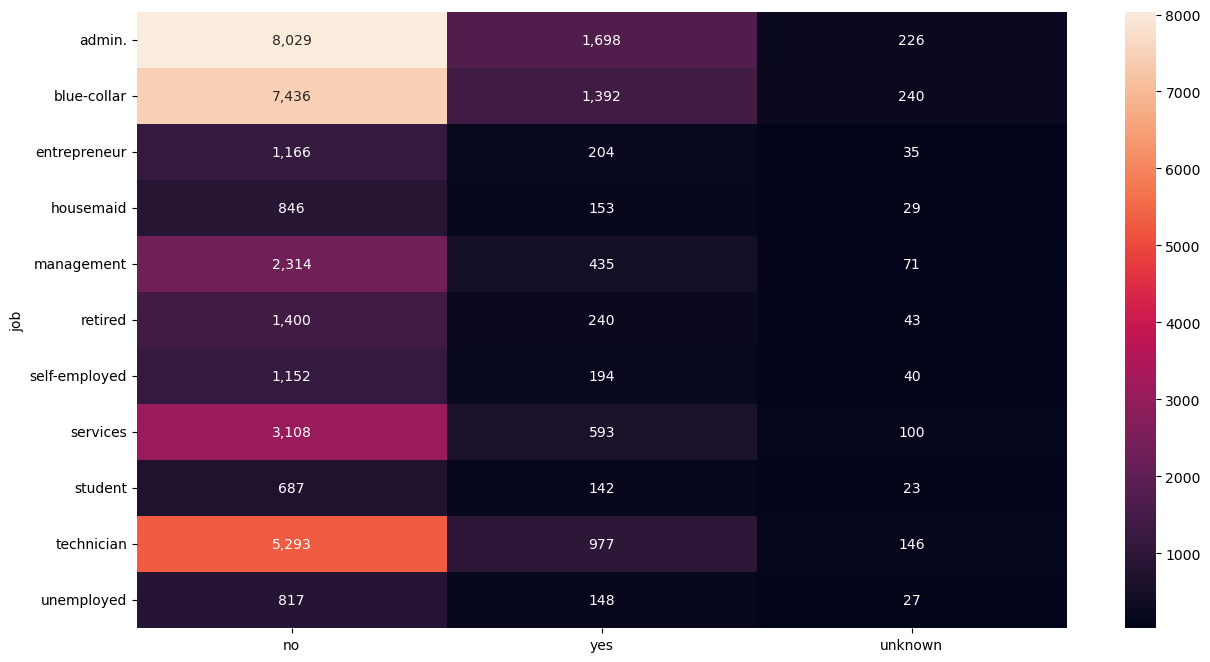

In [33]:
job_loan = cross_tab(df,'job','loan')

plt.figure(figsize=(15, 8))
sns.heatmap(job_loan, annot = True, fmt = ',.0f')
plt.show()

In [34]:
def fill_loan(df, job_loan):
    
    for i in job_column:
        ind = df[(df['loan'] == 'unknown') & (df['job'] == i)].index
        
        probability_no = job_loan.loc[i]['no'] / (job_loan.loc[i]['no'] + job_loan.loc[i]['yes'])
        
        mask = np.random.rand(len(ind)) < probability_no
        
        df.loc[ind[mask], "loan"] = 'no'
        df.loc[ind[~mask], "loan"] = 'yes'
        
    return df

df = fill_loan(df, job_loan)

In [35]:
print(df['loan'].value_counts())

loan
no     33079
yes     6325
Name: count, dtype: int64


**'marital'** sütunumzdada unknoün dəyərlərini mode() ilə dolduraq.

In [36]:
df['marital'].value_counts()

marital
married     23869
single      10997
divorced     4459
unknown        79
Name: count, dtype: int64

In [37]:
df['marital'].replace({'unknown':df['marital'].mode()[0]}, inplace=True)

In [38]:
df['marital'].value_counts()

marital
married     23948
single      10997
divorced     4459
Name: count, dtype: int64

# Outlier treatment!

İndi isə **outlier**-lara baxaq. Yuxarıda qeyd olunan boxplotlar arasında 'age' və 'campaign' sütunlarında outlier-lar olduğca çoxdur.

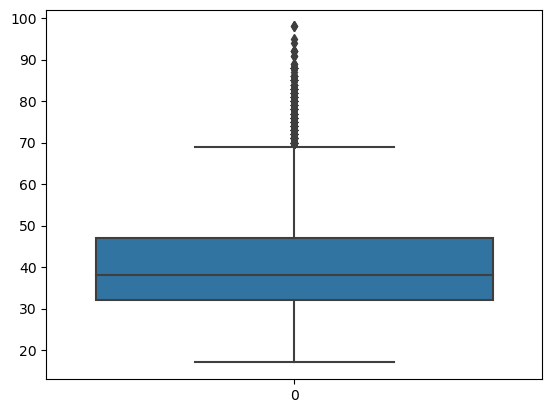

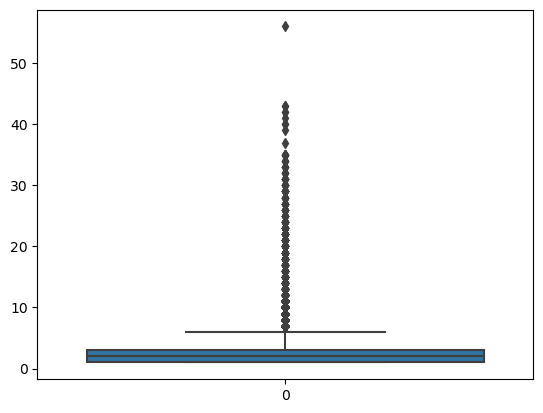

In [39]:
sns.boxplot(df['age'])
plt.show()

sns.boxplot(df['campaign'])
plt.show()

In [40]:
def handle_outliers(df, age_limit = 70, campaign_limit = 7, zscore_threshold = 3):
    
    df['age_zscore'] = np.abs(stats.zscore(df['age']))               # Z-score hesablama
    df['campaign_zscore'] = np.abs(stats.zscore(df['campaign']))
    
    age_outliers = df[df['age_zscore'] > zscore_threshold]           # outlier-ları aşkar etmək
    campaign_outliers = df[df['campaign_zscore'] > zscore_threshold]
    
    df['age'] = np.where(df['age'] > age_limit, age_limit, df['age'])  # 'age' dəyərlərini məhdudlaşdırır
    df['campaign'] = np.where(df['campaign'] > campaign_limit, campaign_limit, df['campaign'])  # 'campaign' sayını məhdudlaşdırır
    
    return df, age_outliers, campaign_outliers

df, age_outliers, campaign_outliers = handle_outliers(df)

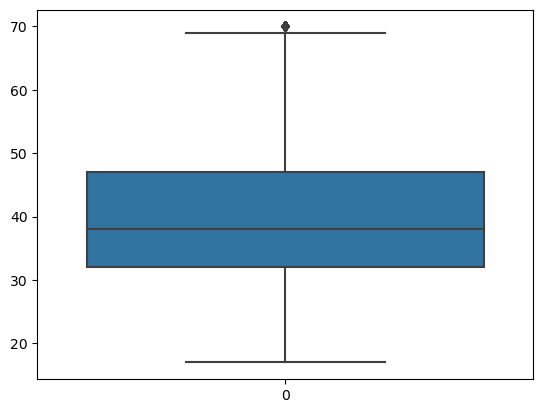

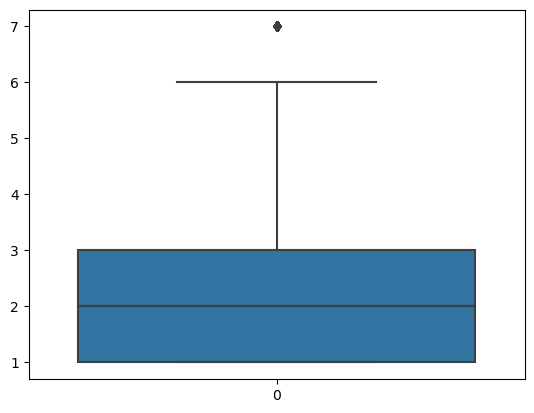

In [41]:
sns.boxplot(df['age'])
plt.show()

sns.boxplot(df['campaign'])
plt.show()

**Outlier-lar hər iki sütun üçün məhdudlaşdırıldı. 'age' sütununda 70-ə qədər, 'campaign' sütununda 7-ə kimi!**

Amma onu qeyd edmək istərdim ki, bu outlier-lar dəyəri o qədər də qeyri-real deyil. 

pip install optbinning

df_binn = df
from optbinning import OptimalBinning

def apply_optbinning(df_binn, column_name, target_column):
    optb = OptimalBinning(name = column_name, dtype = 'numerical', solver = 'mip')
    optb.fit(df[column_name], df_binn[target_column])

    df_binn[column_name + '_binned'] = optb.transform(df[column_name], metric = 'bins')

    return df_binn

df_binn = apply_optbinning(df_binn, 'age', 'y')

df_binn = apply_optbinning(df_binn, 'campaign', 'y')

df_binn

**OptBinning:** Müxtəlif bin-lərə bölür və bu bin-lərin hər biri müəyyən bir qiymət aralığını əhatə edir. Xüsusilə diskriminasiya üçün optimallaşdırır və bu aralıqlara bölmə əsasında dəyər təyin edir. Təsirini daha yaxşı nəzərə almaq üçün kateqoriyalara bölür. Məsələn, müştərilərin yaşını 10-20, 20-30 kimi aralıqlara bölüb hər bir aralıq üçün ortalama bir dəyər təyin edə bilər.

**Normalization və Standardization:** Xüsusiyyətləri davamlı dəyərlərdən ibarət saxlayır. Normalization məlumatları müəyyən bir intervala (məsələn, 0 ilə 1 arasında) gətirir, Standardization isə məlumatları standart normal paylanmaya (ortalama 0, standart div. 1) çevirir. Təsirini dəyişdirmir, sadəcə olaraq onları yenidən scale edir.

# Data Preparation

In [42]:
# əlavə olunmuş z-score sütunlarımı silək

df = df.drop(['age_zscore', 'campaign_zscore'], axis = 1)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [43]:
df.shape

(39404, 20)

DataFrame-dəki **'pdays'** sütununda dəyərlərdən biri 999-dur. Bu default olaraq doldurulmuş dəyərdir. Birdə buna baxaq.

In [44]:
df['pdays'].value_counts()

pdays
999    37890
3        438
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

In [45]:
pd.crosstab(df['pdays'],df['poutcome'], values=df['age'], aggfunc='count', normalize=True)

poutcome,failure,nonexistent,success
pdays,,,
0,0.000000,0.000000,0.000381
1,0.000000,0.000000,0.000660
2,0.000000,0.000000,0.001548
3,0.000102,0.000000,0.011014
4,0.000051,0.000000,0.002944
5,0.000102,0.000000,0.001066
6,0.000634,0.000000,0.009821
7,0.000381,0.000000,0.001142
8,0.000152,0.000000,0.000305


Yuxarıdakı cədvəldən göründüyü kimi, 'pdays' üçün dəyərlərin əksəriyyəti yoxdur. Bu çatışmayan dəyərlərin əksəriyyəti 'poutcome' 'nonexistent' olduqda baş verir. Bu o deməkdir ki, müştəri ilə əvvəllər heç vaxt əlaqə saxlanılmadığı üçün 'pdays'dəkı dəyərlərin əksəriyyəti yoxdur. \
'pdays' sütununu çıxardıb və onu kateqoriyalara malik numeric sütunlarla əvəz etdirəm.

In [46]:
# Dataframe-ə yeni numeric sütunlar əlavə edilir

df['pdays_missing'] = 0
df['pdays_less_5'] = 0
df['pdays_greater_15'] = 0
df['pdays_bet_5_15'] = 0

df['pdays_missing'][df['pdays'] == 999] = 1

df['pdays_less_5'][df['pdays'] < 5] = 1

df['pdays_greater_15'][(df['pdays'] > 15) & (df['pdays'] < 999)] = 1

df['pdays_bet_5_15'][(df['pdays'] >= 5)&(df['pdays'] <= 15)] = 1

df.drop('pdays',axis = 1, inplace = True)

In [47]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0


In [48]:
# yenidən categoric sütunlarımızın unique dəyərlərinə baxaq

for i in df.select_dtypes(include='object').columns:
  print(i, df[i].unique(), sep='\n')

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
marital
['married' 'single' 'divorced']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


Gördüyümüz kimi bizim çox sayda categoric sütunlarımız vardır. get_dummies() funksiyasından istifadə edərək bu sütunlar əsasında yeni sütunlar yaradaq.

In [49]:
# Bütün kateqorik dəyişənlər üçün get_dummies tətbiq edirəm

df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 
                                         'contact', 'month', 'day_of_week', 'poutcome', 'y'], drop_first=True)

In [50]:
df.head()

,age,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,pdays_missing,pdays_less_5,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,False,False,False,True,False,False,False,True,False,False
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,False,False,False,True,False,False,False,True,False,False
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,False,False,False,True,False,False,False,True,False,False
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,False,False,False,True,False,False,False,True,False,False
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,False,False,False,True,False,False,False,True,False,False


In [51]:
df['y_yes'].value_counts()

y_yes
False    34806
True      4598
Name: count, dtype: int64

In [52]:
df_majority = df[df['y_yes'] == False] # major (çoxluq) sinifləri 
df_minority = df[df['y_yes'] == True]  # minor (əksik) sinifləri 

df_minority_upsampled = resample(df_minority, replace = True, n_samples = len(df_majority), random_state = 42)  

df = pd.concat([df_majority, df_minority_upsampled])

print(df['y_yes'].value_counts())

y_yes
False    34806
True     34806
Name: count, dtype: int64


In [53]:
df.head()

,age,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,pdays_missing,pdays_less_5,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,False,False,False,True,False,False,False,True,False,False
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,False,False,False,True,False,False,False,True,False,False
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,False,False,False,True,False,False,False,True,False,False
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,False,False,False,True,False,False,False,True,False,False
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,False,False,False,True,False,False,False,True,False,False


In [54]:
df.shape

(69612, 51)

In [55]:
X = df.drop('y_yes', axis=1)  
y = df['y_yes'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 13)

In [56]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building

In [57]:
# Cross-Validation istifadə edərək modelləri evaluate edək 

class ModelEvaluator():
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
        # modeller
        
        self.models = {
            'Logistic Regression': LogisticRegression(),
            'Random Forest': RandomForestClassifier(),
            'Support Vector Machine': SVC(),
            'K-Nearest Neighbors': KNeighborsClassifier(),
            'Decision Tree': DecisionTreeClassifier(),
            'Naive Bayes': GaussianNB()
        }
        
        # metric-lər
        
        self.scorers = {
            'F1 Score': make_scorer(f1_score),
            'Accuracy': make_scorer(accuracy_score),
            'Precision': make_scorer(precision_score),
            'Recall': make_scorer(recall_score)
        }
        
        # ən yaxşı model
        
        self.best_models = {
            'F1 Score': {"model": None, "score": 0},
            'Accuracy': {"model": None, "score": 0},
            'Precision': {"model": None, "score": 0},
            'Recall': {"model": None, "score": 0}
        }
        
    def evaluate_models(self):
        # modelleri evaluate etmək
        
        for name, model in self.models.items():
            print(f'Model: {name}')
            for metric_name, scorer in self.scorers.items():
                
                scores = cross_val_score(model, self.X_train, self.y_train, cv = 5, scoring = scorer) # CV tətbiq olunur (5-fold)
                
                print(f'CV {metric_name}: {scores.mean()}') 
                
                # ən yaxşı modeli seçmək üçün
                
                if scores.mean() > self.best_models[metric_name]['score']:
                    self.best_models[metric_name]['model'] = name
                    self.best_models[metric_name]['score'] = scores.mean()

            # modelin test datası üzrə performansını yoxlayaq
            
            model.fit(self.X_train, self.y_train)
            y_pred = model.predict(self.X_test)
            for metric_name, scorer in self.scorers.items():
                score = scorer._score_func(self.y_test, y_pred)
                print(f'Test {metric_name} for {name}: {score}')
            print('------------------------------')
    
    def get_best_models(self):
        # ən yaxşı modelləri göstərin
        
        for metric_name, info in self.best_models.items():
            print(f'Ən yaxşı model ({metric_name}): {info["model"]} - Score: {info["score"]}')

In [58]:
# Class-ın istifadəsi
model_evaluator = ModelEvaluator(X_train_scaled, y_train, X_test_scaled, y_test)
model_evaluator.evaluate_models()
model_evaluator.get_best_models()

Model: Logistic Regression
CV F1 Score: 0.71170889004045
CV Accuracy: 0.7428995111017379
CV Precision: 0.8099303140910272
CV Recall: 0.6347895410419736
Test F1 Score for Logistic Regression: 0.708470018822264
Test Accuracy for Logistic Regression: 0.7404232905573644
Test Precision for Logistic Regression: 0.8079234637556728
Test Recall for Logistic Regression: 0.6308178509864011
------------------------------
Model: Random Forest
CV F1 Score: 0.9507570470687595
CV Accuracy: 0.9482022899344743
CV Precision: 0.9140974556595788
CV Recall: 0.9894517206671795
Test F1 Score for Random Forest: 0.9588927335640138
Test Accuracy for Random Forest: 0.9573357594330588
Test Precision for Random Forest: 0.9251313095344076
Test Recall for Random Forest: 0.9952116452786822
------------------------------
Model: Support Vector Machine
CV F1 Score: 0.7249236356032919
CV Accuracy: 0.7551306162678783
CV Precision: 0.8269643406238313
CV Recall: 0.6454199558776503
Test F1 Score for Support Vector Machine: 0.

Ən yaxşı model - Random Forest